In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import urllib
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle

sys.path.append(os.path.join('..'))
from adp.curve import * 
from adp.utility import *
from adp.plot import *
from adp.funcs import *
from adp.optim import *

In [2]:
# Setup a toy function f(x,y) = Ax + sin (2y) where (x,y) is a D-dim input, A is just a weight vector
def f(x):
    # multivariate function which is monotonic in the last variable with sin function
    if np.asarray(x).ndim == 1:
        xx = np.expand_dims(x,0)
    else:
        xx = x
    D = xx.shape[1]
    np.random.seed(12)
    A = np.random.random(D-1)
    return np.dot(xx[:, :-1], A) + np.sin(2*xx[:, -1])

In [3]:
D = 15
np.random.seed(0)
x0 = np.random.random(D)
np.random.seed(0)
X = np.random.random((100, D))
feature_labels = ['x%d'%i for i in range(D)]

def plot_curves(best_curves, utility):
    n_change = len(best_curves)
    fig, axes = plt.subplots(1, n_change, figsize=np.array([8*n_change, 4])*0.55, dpi=150, sharey=True)
    for c, ax in zip(best_curves, axes):
        plot_curve_vals(c, utility=utility, feature_labels=feature_labels, ax=ax)
    fig.tight_layout()

In [4]:
n_numeric_change = np.arange(2) + 1

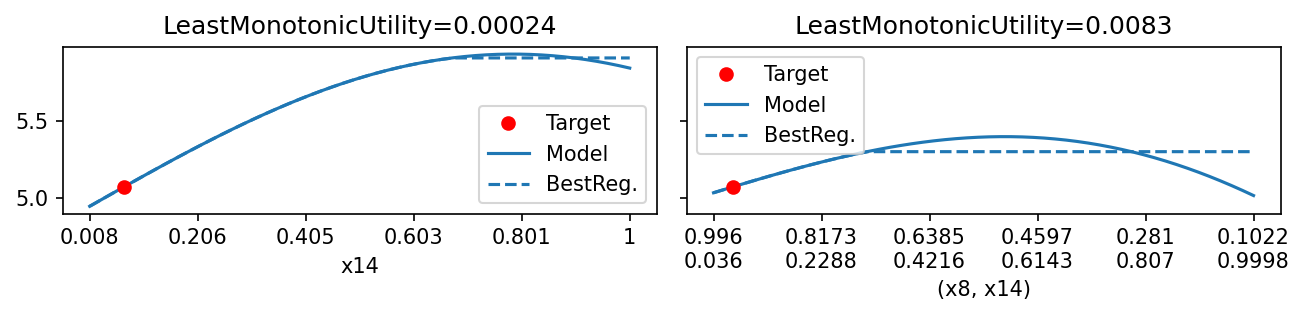

In [5]:
mono_utility = LeastMonotonicUtility(f)
best_curves_mono = [
    optimize_curve(x0, mono_utility, X, max_numeric_change=nc, dtypes=None)
    for nc in n_numeric_change
]
plot_curves(best_curves_mono, mono_utility)

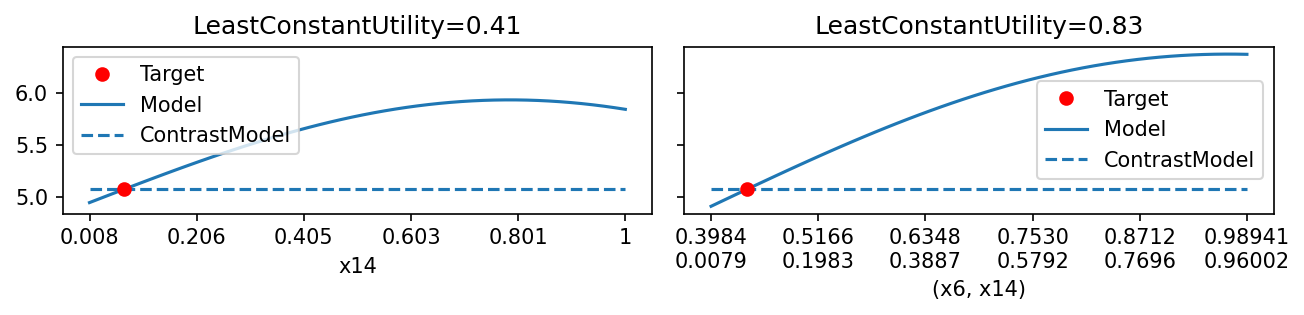

In [6]:
constant_utility = LeastConstantUtility(f)
best_curves_constant = [
    optimize_curve(x0, constant_utility, X, max_numeric_change=nc, dtypes=None)
    for nc in n_numeric_change
]
plot_curves(best_curves_constant, constant_utility)

In [7]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
from matplotlib import cm

# def g1(X,Y):
#     return np.exp(-(X**2 + Y**2) / 2) / (2 * np.pi)

def g1(X,Y):
    return np.exp(-((X +1.5)**2 + (Y+1)**2) / 2) / (2 * np.pi)

def g2(X,Y):
    return np.exp(-(((X - 1) / 1.5)**2 + ((Y - 1) / 0.5 )**2) / 2) /\
          (2 * np.pi * 0.5 * 1.5)

def g3(X,Y):
    return np.exp(-(((X+2) / 1.5)**2 + (Y+2)**2) / 2) / (2*np.pi)

def g4(X,Y):
    return np.exp(-(((X-1.5))**2 + (Y+2)**2)) / (2*np.pi)

def get_toy_data(delta=0.01):
    x = y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)

    Z1 = g1(X,Y)
    Z2 = g2(X,Y)
    Z3 = g3(X,Y)
    Z4 = g4(X,Y)
    Z = Z2  -Z1 + Z3 
    return X, Y, Z

def ff(x):
    if np.asarray(x).ndim == 1:
        xx = np.expand_dims(x,0)
    else:
        xx = x
    X = xx[:,0]
    Y = xx[:,1]
    Z1 = g1(X,Y)
    Z2 = g2(X,Y)
    Z3 = g3(X,Y)
    Z4 = g4(X,Y)
    return  Z2  -Z1 + Z3 
X, Y, Z = get_toy_data(0.01)

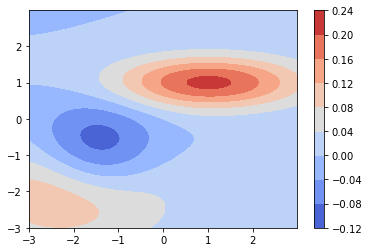

In [8]:
plt.contourf(X, Y, Z, cmap=cm.coolwarm)
plt.colorbar()

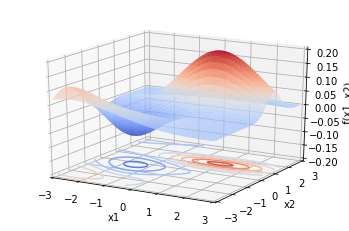

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=10, cstride=10, alpha=0.8, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='z', offset=-0.2, cmap=cm.coolwarm)

ax.set_xlabel('x1')
ax.set_xlim(-3, 3)
ax.set_ylabel('x2')
ax.set_ylim(-3, 3)
ax.set_zlabel('f(x1, x2)')
ax.set_zlim(-0.2, 0.2)
ax.view_init(elev=20.)

In [10]:
x0 = np.array([-1,-0.5])
#x0 = np.array([1.5,2])
np.random.seed(1)
X_ = np.random.random((10000, 2)) * 6 - 3

feature_labels = ['x1', 'x2']

n_numeric_change = np.arange(3) + 1

lmono_utility = LeastMonotonicUtility(ff)
best_curves_lmono = [
    optimize_curve(x0, lmono_utility, X_, max_numeric_change=nc, dtypes=None)
    for nc in [1,2]
]

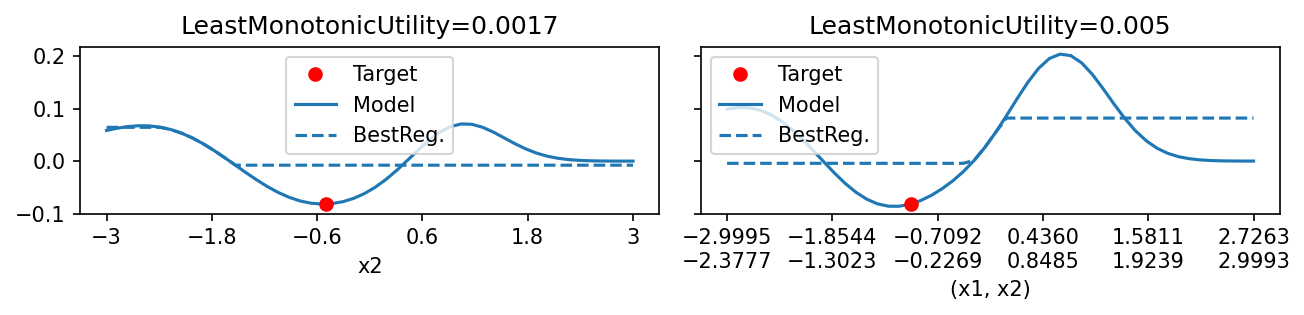

In [11]:
plot_curves(best_curves_lmono, lmono_utility)

In [12]:
def obtain_endpoints(x0, dir_vec, xlim, ylim):
    slope = dir_vec[1] / dir_vec[0]
    def df(x):
        return slope * (x - x0[0]) + x0[1]
    y1 = df(xlim[0])
    y2 = df(xlim[1])
    return (xlim[0], xlim[1]), (y1, y2)
    

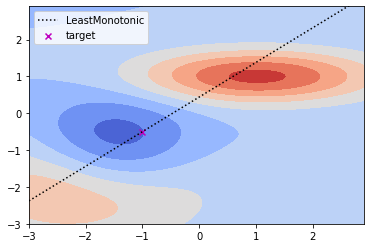

In [13]:
plt.contourf(X, Y, Z, cmap=cm.coolwarm)
plt.scatter([x0[0]], [x0[1]], c='m', marker='x', label='target')

unit_dir_lmono = best_curves_lmono[1].v

p1, p2 = obtain_endpoints(x0, unit_dir_lmono, [-3, 2.9], [-3, 2.9])
plt.plot(p1, p2, 'k:', label='LeastMonotonic')

plt.xlim(-3,2.9)
plt.ylim(-3,2.9)
plt.legend()